In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def adatcsv(start_date,end_date,countries,delete_columns=[]):
    '''
    beolvassa a csv fájlt és csinál belőle egy pandas adatszerkezetet,

    start_date, end_date stringek yyyy-mm-dd alakban,

    countries egy string lista azon országokból, amiket meg akarunk tartani,
    
    delete_columns string lista azon oszlopokról, amiket ki akarunk törölni
    '''  
    df = pd.read_csv('owid-covid-data.csv')                
    df = df[df["location"].isin(countries)]
    df = df[(df["date"]>=start_date) & (df["date"]<=end_date)]
    df = df.drop(delete_columns, axis=1)

    return df

In [4]:
df = pd.read_csv('owid-covid-data.csv')

In [5]:
europe_rows = df[df['continent'] == 'Europe']
df_k= df['people_vaccinated']
start_date='2020-11-05'
end_date='2022-11-12'
hun=['Hungary']
K= adatcsv(start_date,end_date,hun)

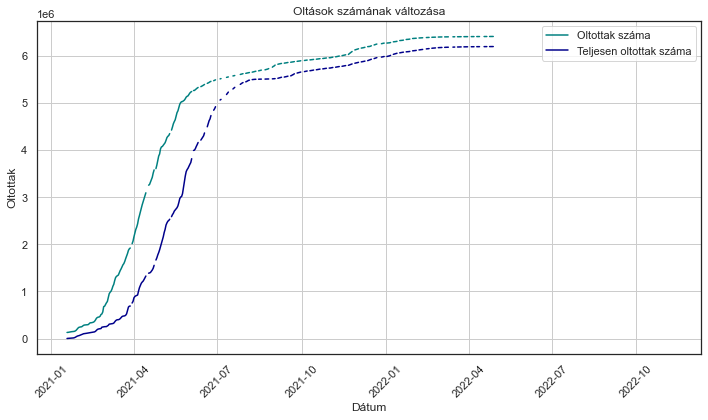

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

K['date'] = pd.to_datetime(K['date'])
sns.set_theme(style="white")
plt.figure(figsize=(10, 6))
plt.plot(K['date'], K['people_vaccinated'], linestyle='-', color='teal', label='Oltottak száma')
plt.plot(K['date'], K['people_fully_vaccinated'], linestyle='-', color='darkblue',label='Teljesen oltottak száma')

plt.title('Oltások számának változása')
plt.xlabel('Dátum')
plt.ylabel('Oltottak')
plt.xticks(rotation=45) 
plt.grid(True) 
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()


In [7]:
eu_members= [
    "AUT",  
    "BEL",  
    "BGR",  
    "CYP",  
    "CZE",  
    "DEU",  
    "DNK",  
    "EST",  
    "ESP",  
    "FIN",  
    "FRA",  
    "GRC",  
    "HRV",  
    "HUN",  
    "IRL",  
    "ITA",  
    "LTU",  
    "LUX",  
    "LVA",  
    "MLT",  
    "NLD",  
    "POL",  
    "PRT",  
    "ROU",  
    "SWE",  
    "SVN",  
    "SVK",  
]

filtered_df = df[df['iso_code'].isin(eu_members)]
eu_countries = filtered_df['location'].tolist()
eu_countries=list(set(eu_countries))


In [8]:
start_date='2021-12-11'
end_date='2021-12-11'
E_Europe=adatcsv(start_date,end_date,eu_countries,delete_columns=[])
average_deaths = E_Europe['total_deaths'].mean()

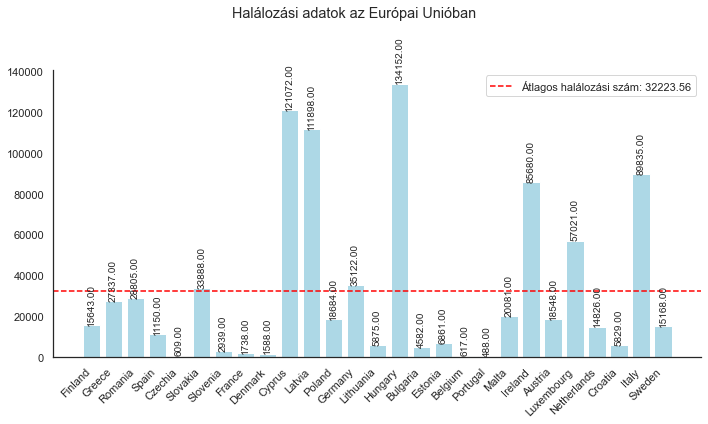

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
E_Europe['MortalityComparison'] = E_Europe['total_deaths'] 
plt.figure(figsize=(10, 6))
bars = plt.bar(eu_countries, E_Europe['MortalityComparison'], color='lightblue')
data={'Countries':['Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden']}
sample_df = pd.DataFrame(data)
plt.suptitle('Halálozási adatok az Európai Unióban')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)    
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10, rotation=90) 
plt.axhline(y=average_deaths, color='red', linestyle='--', label=f'Átlagos halálozási szám: {average_deaths:.2f}')
plt.legend()
plt.tight_layout()
plt.show()


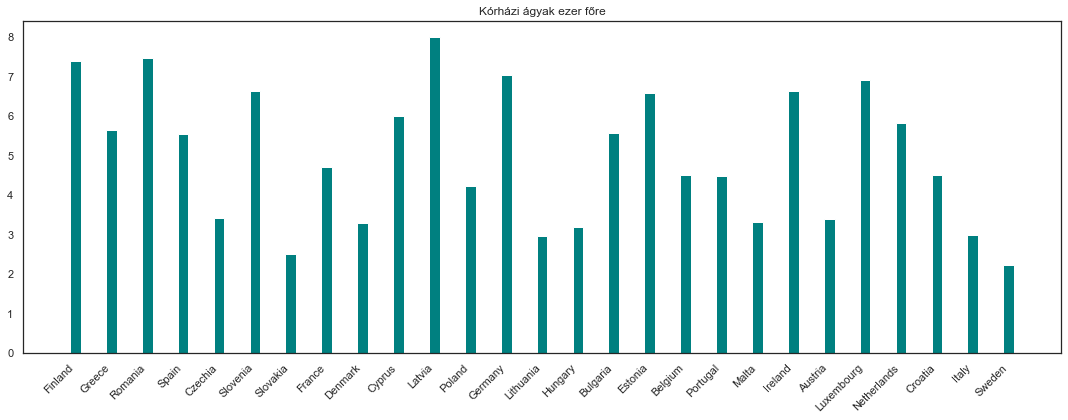

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15, 6))
F=df[df['continent']=='Europe']
#Fl=F['location']
EUR = F['location'].tolist()
EUR=list(set(eu_countries))
bars = plt.bar(EUR, E_Europe['hospital_beds_per_thousand'], color='teal', width=0.3 )

sample_df = pd.DataFrame(data)   
plt.xticks(rotation=45, ha='right')
plt.title('Kórházi ágyak ezer főre')
plt.tight_layout()
plt.show()


In [14]:
start_date=str(input('Adj meg egy kötőjellel elválasztott dátumot'))
end_date=start_date
pupak=adatcsv(start_date,end_date,eu_countries,delete_columns=[])
#2021-01-13

C:\Users\user\AppData\Local\Temp\ipykernel_9440\976639714.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values('total_cases',ascending=False,inplace=True)


Text(0.5, 0, 'Esetek')

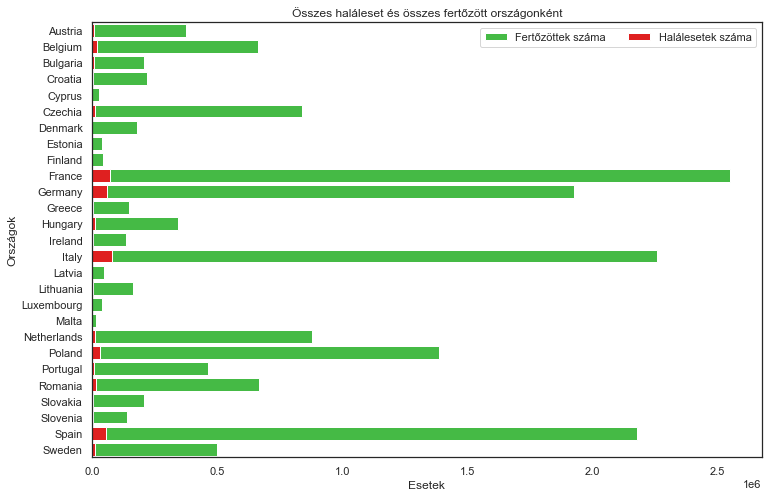

In [15]:
f, ax = plt.subplots(figsize=(12, 8))
data = pupak[['location','total_cases','total_deaths']]
data.sort_values('total_cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="total_cases", y="location", data=pupak,label="Fertőzöttek száma", color="limegreen")

sns.set_color_codes("muted")
sns.barplot(x="total_deaths", y="location", data=pupak, label="Halálesetek száma", color="red")
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set_title('Összes haláleset és összes fertőzött országonként')
plt.ylabel('Országok')
plt.xlabel('Esetek')

In [16]:
#Modellezes
from bokeh.io import output_file, show
from bokeh.models import (BoxZoomTool, Circle, HoverTool,
                          MultiLine, Plot, Range1d, ResetTool)
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx
import networkx as nx
from bokeh.io import output_file, show
from bokeh.models import BoxZoomTool, Circle, HoverTool, MultiLine, Plot, Range1d, ResetTool, TapTool, BoxSelectTool
from bokeh.plotting import from_networkx

G = nx.Graph()
G.add_nodes_from(['A1', 'A2', 'A3', 'A4', 'B1','B2','B3','B4','C1','C2','C3','C4','D1','D2','D3','D4','E1','E2','E3','E4','E5','E6',
                  'E7','E8','E9','E10','P1'])
node_positions = {'A1': (0.1, 0.9), 'A2': (0.1, 0.8), 'A3': (0.3, 0.9), 'A4': (0.3, 0.8), 
                  'B1':(0.5,0.9),'B2':(0.5,0.8),'B3':(0.7,0.9),'B4':(0.7,0.8), 
                  'C1':(0.1,0.6),'C2': (0.1, 0.5), 'C3': (0.3, 0.6), 'C4': (0.3, 0.5),
                  'D1':(0.5,0.6),'D2':(0.7,0.6),'D3':(0.5,0.5),'D4':(0.7,0.5),
                  'E1':(0.9,0.9),'E2':(1.1,0.9),'E3':(0.9,0.8),'E4':(1.1,0.8),
                  'E5':(0.9,0.6),'E6':(1.1,0.6),'E7':(0.9,0.5),'E8':(1.1,0.5),'E9':(0.9,0.7),'E10':(1.1,0.7),'P1':(0.6,0.7)}

G.add_edges_from([('A1', 'A2'), ('A2', 'A4'), ('A3', 'A4'), ('A3', 'A1'),('A2','A3'),('A1','A4'),
                  ('B1','B2'),('B2','B4'),('B3','B4'),('B3','B1'),('B2','B3'),('B4','B1'),
                  ('C1', 'C2'), ('C2', 'C4'), ('C3', 'C4'), ('C3', 'C1'),('C1','C4'),('C2','C3'),
                  ('D1', 'D2'), ('D2', 'D4'), ('D3', 'D4'), ('D3', 'D1'),('D4','D1'),('D2','D3'),
                  ('E1', 'E2'), ('E2', 'E4'), ('E3', 'E4'), ('E3', 'E1'),('E1','E4'),('E2','E3'),
                  ('E5', 'E6'), ('E6', 'E8'), ('E7', 'E8'), ('E7', 'E5'),('E5','E8'),('E6','E7'),
                  ('E10','E3'),('E9','E4'),
                  ('E9','E10'),('E9','E5'),('E3','E9'),('E6','E10'),('E10','E4'),('E9','E6'),('E10','E5'),
                  ('B3','E1'),('B4','E3'),('D2','E5'),('D4','E7')])
for node in G.nodes:
    if node != 'P1':
        G.add_edge('P1', node)
        
pincer=[] 
vendeg=[]       
for edge in G.edges:
    if 'P1' in edge:
        pincer.append(edge)
pincer=tuple(pincer)
        
for edge in G.edges:
    if 'P1' not in edge:
        vendeg.append(edge)
vendeg=tuple(vendeg)
'''edge_colors={
    pincer:'white',
    vendeg:'lightgrey'
}              '''
nx.set_node_attributes(G, node_positions, 'pos')
plot = Plot(width=400, height=400, x_range=Range1d(-1, 3), y_range=Range1d(-2, 2))
plot.add_tools(BoxZoomTool(), TapTool(),ResetTool(),BoxSelectTool() )

graph_renderer = from_networkx(G, nx.get_node_attributes(G, 'pos'))
graph_renderer.edge_renderer.glyph = MultiLine(line_color='lightgray', line_alpha=0.8, line_width=5)
'''for edge_set, color in edge_colors.items():
    for edge in edge_set:
        graph_renderer.edge_renderer.glyph.line_color[edge]= color'''
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color="red", line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color="red", line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color="blue")

plot.renderers.append(graph_renderer)


output_file("Modellezes.html")
show(plot)


In [29]:

countries=['Hungary','Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',]
start_date='2021-02-13'
end_date=start_date
Vacc=adatcsv(start_date,end_date,countries)
Vacc=Vacc[['location','people_vaccinated']]
Vacc



,location,people_vaccinated
32075,Belgium,394712.0
50147,Bulgaria,54646.0
77291,Croatia,NaN
81809,Cyprus,29592.0
83315,Czechia,295232.0
86347,Denmark,NaN
101260,Estonia,45994.0
113354,Finland,NaN
149515,Hungary,335188.0


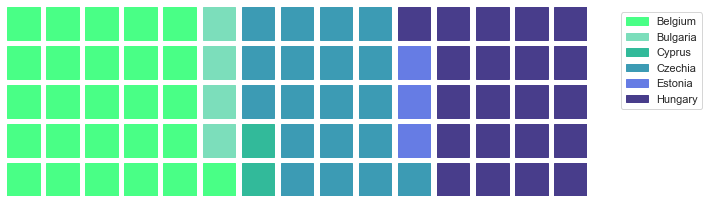

In [56]:
from pywaffle import Waffle

data1={'Belgium':Vacc.iloc[0,1],'Bulgaria':Vacc.iloc[1,1] ,'Cyprus':Vacc.iloc[3,1] ,'Czechia':Vacc.iloc[4,1],
       'Estonia':Vacc.iloc[6,1], 'Hungary':Vacc.iloc[8,1]}
fig=plt.figure(
    FigureClass=Waffle,
    rows =5,
    columns=15,
    figsize=(10,5),
    colors=['#995571','#e16fb7','#32BA9A','#3C9BB4','#667CE4','darkslateblue'],
    values=data1,
    legend={'loc':"upper left",'bbox_to_anchor':(1.05,1)})

plt.show()

